# Binomial Expansion


There are many (reasonably complicated) examples of python code to compute binomial expansions. Here we will look at two examples - one to compute the binomial expansion coefficients using the scipy library, and one to actually perform the expansion itself using the sympy library we looked at during last class. 


The code below demonstrates the use of the scipy function `binom` which returns the binomial coefficient for the given values of `n` and `k`. The order the numbers are given in is `scipy.special.binom(n,k)` 



In [1]:
import scipy 
from scipy.special import binom
print(scipy.special.binom(5,2))

10.0


Using the above code, do you find that particular values of `k` give you the same binomial coefficients? Write any pairs of coefficients in the space below. An empty cell is also included if you wish to copy and paste the above code.

In [15]:
print(scipy.special.binom(10,1))

10.0


We can use `sympy` to write out the binomial expansion, including coefficients, for positive, integer values of `n`

In [2]:
import sympy
x, y = sympy.symbols("x y")
formula = (x + y) ** 5
formula.expand()


x**5 + 5*x**4*y + 10*x**3*y**2 + 10*x**2*y**3 + 5*x*y**4 + y**5

# Taylor Series



One way we can use Taylor Series in Jupyter Notebooks is by calculating each term of the series directly. We can combine these terms in a line of Python code to estimate, for example,  e<sup>2</sup>. The code below calculates the sum of the first five terms of the Taylor Series expansion of e<sup>x</sup>, where x=2. Note the math module needs to be imported before math.factorial() can be used.

In [3]:
import math

x = 2
e_to_2 = x**0/math.factorial(0) + x**1/math.factorial(1) + x**2/math.factorial(2) + x**3/math.factorial(3) + x**4/math.factorial(4)
print(e_to_2)

7.0


Our Taylor Series approximation of e<sup>2</sup> was calculated as 7.0. Let's compare our Taylor Series approximation to Python's `math.exp()` function. Python's `math.exp()` function raises e to any power. In our case, we want to use `math.exp(2)` because we want to calculate e<sup>2</sup>.

In [4]:
print(math.exp(2))

7.38905609893065


Our Taylor Series approximation 7.0 is not that far off the calculated value 7.389056... using Python's exp() function.

We can recreate our approximation of e<sup>2</sup> with 5 terms using a `for` loop. Note we need to set the variable e_to_2 to 0 before the loop starts. The mathematical operator += in the line `e_to_2 += x\**i/math.factorial(i)` is equivalent to e_to_2 = e_to_2 + `x\**i/math.factorial(i)`, which we used in our `while` loop in the last class.

In [5]:
import math

x = 2
e_to_2 = 0
for i in range(5):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.0


This makes it much easier to change the number of terms in our Taylor Series! Copy the above code into the box below, and use it to calculate the value of e<sup>2</sup> by using a Taylor Series with 10 terms:

In [16]:
import math

x = 10
e_to_2 = 0
for i in range(5):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

644.3333333333334


How does this value compare to the value given by the `exp` function? Which Taylor Series gives an approximation closest to the actual value?

We can make our above code more easily reusable by writing it as a function:

In [6]:
import math

def func_e_to_2(n):
    x = 2
    e_to_2 = 0
    for i in range(n):
        e_to_2 += x**i/math.factorial(i)
    
    return e_to_2

We can use the new function to calculate a Taylor Series approximation to e<sup>2</sup> with any number of terms eg:


In [7]:
func_e_to_2(1)

1.0

We can be even more general by writing a function that will give a Taylor series approximation with `n` terms for e raised to any power `x`:

In [8]:
import math

def func_e(x, n):
    e_approx = 0
    for i in range(n):
        e_approx += x**i/math.factorial(i)
    
    return e_approx

In [9]:
func_e(2,5)

7.0

### Plotting a Taylor Series Approximation


One great thing about using Jupyter Notebooks is the ease with which we can produce plots! Let's have a look at a some Taylor Series approximations to the `cos(x)` function. We start with a piece of code which gives us the functon that will calculate our Taylor Series for cos(x) around the point x=0 up to a specified number of terms.

In [10]:
import math

def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx

We use this to estimate the value of cos(45) (degrees) using a Taylor Series with 5 terms:

In [11]:
angle_rad = (math.radians(45))
out = func_cos(angle_rad,5)
print(out)

0.7071068056832942


Comparing with the actual value:

In [12]:
out = math.cos(angle_rad)
print(out)

0.7071067811865476


We see this is a pretty good approximation! Let's look at some plots showing Taylor Series approxmations to cos(x)

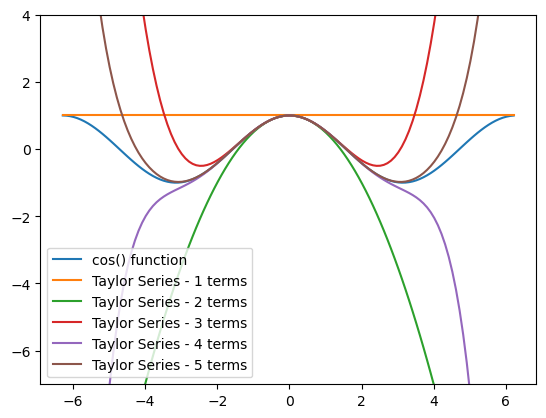

In [13]:

import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_cos)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    t_cos = [func_cos(angle,i) for angle in angles]
    ax.plot(angles,t_cos)

ax.set_ylim([-7,4])

# set up legend
legend_lst = ['cos() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

We see the Taylor Series with 5 terms (the brown line) comes closest to approximating Python's cos() function. The Taylor Series with 5 terms is a good approximation of the cosine of angles between about −π and π radians. The Taylor Series with 5 terms is a worse approximation for angles less than −π or greater than π. As the angle gets further away from zero radians, the estimate of the cosine using a Taylor Series gets worse and worse.

# References

https://www.askpython.com/python/examples/binomial-coefficient


https://pythonforundergradengineers.com/creating-taylor-series-functions-with-python.html


